# Ground Beetle Taxonomy

## Background

We would like to know how many ground beetles classified by the domain staff must be evaluated by an expert taxonomist to establish with a certain degree of confidence that the classification success rate succeeds a given threshold.  Specifically, we want to be relatively certain that the domain staff can:
* achieve a 95% success rate on classifying ground beetles by genus
* achieve an 80% success rate on classifying ground beetles by species

## Methodology

Assume that the classification procedure by the doamin staff can be modeled as a binomial function (each classification is either correct or incorrect) with a certain probability.  Assume that the expert taxonomists are 100% correct, so that the taxonomist's result indicates with complete certainty whether a beetles was classified correctly or not.  Given an suitably large number of samples, the fraction of beetles correctly classified will match the probability that the domain staff perform the classification correctly.  For finite samples, random effects may cause the fraction of correctly classified beetles to deviate from the probability of success associated with the classifications.  The greater the number of samples, the smaller the "error bar" associated with the estimate of the success fraction.

In [24]:
import numpy as np
from numpy.random import binomial

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams.update({'font.size': 22})

## Coin flip test

This demonstrates how to test the case of flipping a coin (p=50%) ten times (n=10) a million times (ntrials=1,000,000).  Resulting set of outcomes is stored in `s`.

In [26]:
# create a histogram of outcomes...
p = 0.5
n = 10
ntrials = 1000000
s = np.random.binomial(n, p, ntrials) / float(n)

As a sanity check, we plot the results.

0 955.0 -0.05
1 9844.0 0.05
2 43862.0 0.15
3 117697.0 0.25
4 204550.0 0.35
5 245718.0 0.45
6 205843.0 0.55
7 117385.0 0.65
8 43521.0 0.75
9 9601.0 0.85
10 1024.0 0.95


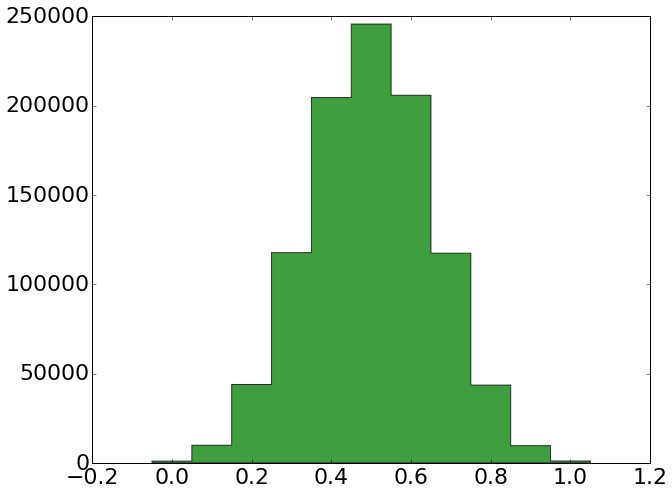

In [27]:
# define bins...
nbins = 11
nedges = nbins+1
b = np.zeros(nedges)
for i in range(0,nedges):
    b[i] = (i-0.5)/float(n)
    
binvals, binlocs, patches = plt.hist( s, bins=b, histtype='stepfilled')
plt.setp( patches, 'facecolor', 'g', 'alpha', 0.75)
for i in range(0,len(binvals)):
    print i, binvals[i], binlocs[i]

That looks like a Gaussian distribution, as it should.

## Measuring confidence intervals

Now try to determine the "error bar" on the estimate by measuring the width of the symmetric interval containing the given fraction of the results. 

In [28]:
def errorWidth( a, c, debug=False):
    '''Given an array of results (a) and a confidence level (c, where 0<c<1), 
    return the half-width of the symmetric internal enclosing the given
    fraction of the results.'''
    
    # sort a, creating s...
    s = np.sort(a)

    # locate the endpoints of the confidence interval...
    n = len(s)
    j = int(c*float(n))
    i = n - j
    
    # find the data values at those locations...
    bottom = s[i]
    top = s[j]
    w = 0.5*(top-bottom)
    if debug:
        print i, j, bottom, top
    return w

Test errorwidth

In [29]:
# test a few different confidence levels...
p = 0.5
n = 10000
ntrials = 1000000
s = np.random.binomial(n, p, ntrials) / float(n)
for c in (0.66, 0.9, 0.95, 0.99):
    print errorWidth( s, c)

0.0021
0.0064
0.0082
0.01165


We see that as the confidence level increases, the size of the error bar increases.  It is harder to define an error bar at the 95% level than at tehe 66% level.

## Consider how confidence interval size changes with number of beetles sampled

In [30]:
def errorArray( n_values, p, c, debug=False):
    '''
    Given an array of sample sizes (n_values), probability of "success" 
    for a binomial process (p), and generates confidence level (c),
    return an array giving the resulting error bar on p at the given 
    confidence level.
    '''
    
    n_trials = 100000
    m = len(n_values)
    w = np.zeros(m)
    for i in range(0,m):
        n = n_values[i]
        s = np.random.binomial(n, p, n_trials) / float(n)
        w[i] = errorWidth( s, c)
        if debug:
            print i, n, w[i]
        
    return w

In [31]:
# create a set of values representing the number of beetles sampled (force to type "int")...
n_values = np.logspace(1.0,4.0,num=31)
n_values.astype(int)

# define the confidence level we seek (90%)...
c = 0.9

# compute curves applying to the case when the expected classification accuracy is 80%...
p = 0.8
y_080 = errorArray( n_values, p, c)

# and when it is 95%...
p = 0.95
y_095 = errorArray( n_values, p, c)

## Print as table

In [32]:
format = "%12s  %25s"
print format % ('Number of', '90% confidence interval for')
format = "%12s  %12s  %12s"
print format % ('beetles', 'P=0.80', 'P=0.95')
line = '-' * 12
print format % (line,line,line)

m = len(n_values)
for i in range(0,m):
    print "%12d  +/-%9.3f  +/-%9.3f" % (n_values[i], y_080[i], y_095[i])

   Number of  90% confidence interval for
     beetles        P=0.80        P=0.95
------------  ------------  ------------
          10  +/-    0.200  +/-    0.050
          12  +/-    0.119  +/-    0.079
          15  +/-    0.126  +/-    0.063
          19  +/-    0.100  +/-    0.050
          25  +/-    0.100  +/-    0.060
          31  +/-    0.095  +/-    0.047
          39  +/-    0.075  +/-    0.050
          50  +/-    0.080  +/-    0.040
          63  +/-    0.063  +/-    0.032
          79  +/-    0.057  +/-    0.031
         100  +/-    0.050  +/-    0.030
         125  +/-    0.048  +/-    0.024
         158  +/-    0.041  +/-    0.022
         199  +/-    0.035  +/-    0.020
         251  +/-    0.032  +/-    0.018
         316  +/-    0.028  +/-    0.016
         398  +/-    0.026  +/-    0.015
         501  +/-    0.023  +/-    0.012
         630  +/-    0.021  +/-    0.011
         794  +/-    0.018  +/-    0.010
        1000  +/-    0.016  +/-    0.009
        1258  +

## Plot results

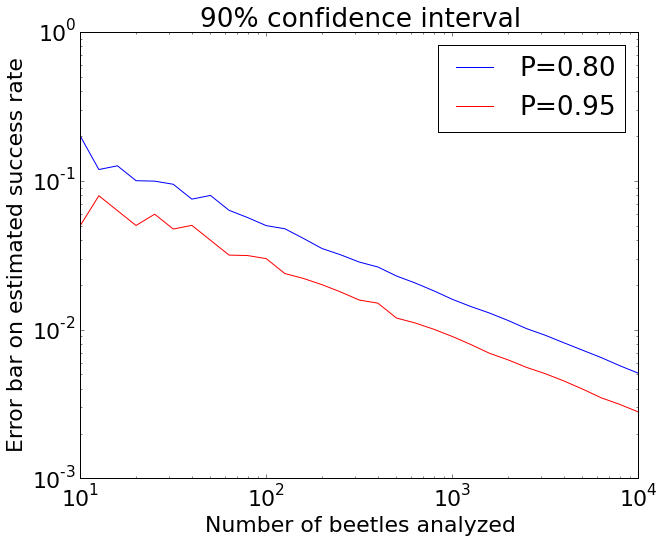

In [33]:
line1, = plt.plot(n_values, y_080, 'b-', label='P=0.80')
line2, = plt.plot(n_values, y_095, 'r-', label='P=0.95')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of beetles analyzed')
plt.ylabel('Error bar on estimated success rate')
plt.title('90% confidence interval')
plt.legend()
plt.show()

## Conclusions

* If the probability of successful classification (P) is 80%, then
  * A sample of 100 beetles will yield an estimate of P to an accuracy of +/- 0.050
  * A sample of 1000 beetles will yield an estimate of P to an accuracy of +/- 0.016
* If the probability of successful classification (P) is 95%, then
  * A sample of 100 beetles will yield an estimate of P to an accuracy of +/- 0.030
  * A sample of 1000 beetles will yield an estimate of P to an accuracy of +/- 0.009